# Laptop Data Visualization


## Inisialisasi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with open('tanpa cooling pad.CSV', encoding='utf8', errors='ignore') as data:
    df = pd.read_csv(data)

In [5]:
df.info()
df.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Columns: 252 entries, Date to Unnamed: 251
dtypes: float64(1), object(251)
memory usage: 2.5+ MB


,Date,Time,Virtual Memory Commited [MB],Virtual Memory Available [MB],Virtual Memory Load [%],Physical Memory Used [MB],Physical Memory Available [MB],Physical Memory Load [%],Page File Usage [%],Core VIDs (avg) [V],...,Battery Voltage [V],Remaining Capacity [Wh],Charge Level [%],Wear Level [%],Total DL [MB],Total UP [MB],Current DL rate [KB/s],Current UP rate [KB/s],Total Errors [],Unnamed: 251
0,16.8.2021,13:38:4.193,11112,7108,60.9,6636,9153,42.0,0.0,1.327,...,15.833,68.018,100.0,10.5,6,1,34.644,24.626,0,NaN
1,16.8.2021,13:38:6.246,11096,7124,60.8,6632,9156,42.0,0.0,1.319,...,15.833,68.018,100.0,10.5,6,1,17.414,5.774,0,NaN
2,16.8.2021,13:38:8.306,10771,7450,59.1,6425,9363,40.6,0.0,1.308,...,15.833,68.018,100.0,10.5,6,2,40.074,17.886,0,NaN
3,16.8.2021,13:38:10.380,10734,7486,58.9,6415,9374,40.6,0.0,1.313,...,15.833,68.018,100.0,10.5,6,2,20.062,2.374,0,NaN
4,16.8.2021,13:38:12.443,10732,7488,58.9,6413,9376,40.6,0.0,1.309,...,15.833,68.018,100.0,10.5,6,2,8.724,2.789,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,16.8.2021,14:22:4.933,12757,5464,70.0,7748,8041,49.0,0.0,1.092,...,15.833,68.018,100.0,10.5,8,3,54.650,21.827,0,NaN
1275,16.8.2021,14:22:7.003,12718,5503,69.7,7747,8041,49.0,0.0,1.112,...,15.833,68.018,100.0,10.5,8,3,47.101,16.304,0,NaN
1276,16.8.2021,14:22:9.075,12713,5507,69.7,7748,8041,49.0,0.0,1.105,...,15.833,68.018,100.0,10.5,8,3,50.275,17.787,0,NaN
1277,16.8.2021,14:22:11.136,12700,5520,69.7,7733,8055,48.9,0.0,1.100,...,15.833,68.018,100.0,10.5,8,3,49.412,19.216,0,NaN


## Explorasi dan _cleaning_ data

In [6]:
# Memeriksa tipe data dalam file CSV
num_feat = [feat for feat in df if df[feat].dtype!=object]
cat_feat = [feat for feat in df if df[feat].dtype==object]
print(f"Data mengandung {df.shape[0]} baris dan {df.shape[1]} kolom")
print(f'Jumlah fitur numerik pada data: {len(num_feat)}')
print(num_feat)
print(f'Jumlah fitur kategori pada data: {len(cat_feat)}')
print(cat_feat)

Data mengandung 1284 baris dan 252 kolom
Jumlah fitur numerik pada data: 1
['Unnamed: 251']
Jumlah fitur kategori pada data: 251
['Date', 'Time', 'Virtual Memory Commited [MB]', 'Virtual Memory Available [MB]', 'Virtual Memory Load [%]', 'Physical Memory Used [MB]', 'Physical Memory Available [MB]', 'Physical Memory Load [%]', 'Page File Usage [%]', 'Core VIDs (avg) [V]', 'Core 0 VID [V]', 'Core 1 VID [V]', 'Core 2 VID [V]', 'Core 3 VID [V]', 'Core 4 VID [V]', 'Core 5 VID [V]', 'Core 6 VID [V]', 'Core 7 VID [V]', 'Core Clocks (avg) [MHz]', 'Core 0 Clock (perf #8) [MHz]', 'Core 1 Clock (perf #4) [MHz]', 'Core 2 Clock (perf #3) [MHz]', 'Core 3 Clock (perf #2) [MHz]', 'Core 4 Clock (perf #7) [MHz]', 'Core 5 Clock (perf #5) [MHz]', 'Core 6 Clock (perf #6) [MHz]', 'Core 7 Clock (perf #1) [MHz]', 'Bus Clock [MHz]', 'Core Effective Clocks (avg) [MHz]', 'Core 0 T0 Effective Clock [MHz]', 'Core 0 T1 Effective Clock [MHz]', 'Core 1 T0 Effective Clock [MHz]', 'Core 1 T1 Effective Clock [MHz]', 'C

Data dalam file CSV memiliki tipe data berupa _object_ padahal apabila diamati seharusnya mayoritas datanya dalam bentuk numerik. Dengan demikian perlu modifikasi tipe data.

In [7]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 251                     1284
Time                                1
Date                                1
Virtual Memory Available [MB]       0
Write Rate [MB/s]                   0
                                 ... 
Core 6 C1 Residency [%]             0
Core 7 C1 Residency [%]             0
Core C6 Residency (avg) [%]         0
Core 0 C6 Residency [%]             0
CPU Core VID (Effective) [V]        0
Length: 252, dtype: int64

Mayoritas data dalam file CSV tidak memiliki nilai NULL kecuali pada kolom Time, Date, dan Unnamed: 251. Setelah diamati, kolom Unnamed: 251 tidak memiliki informasi yang signifikan sehingga dapat dihilangkan atau _drop_

In [8]:
df = df.drop(columns=['Unnamed: 251'])

Modifikasi tipe data dilakukan untuk kolom dengan data numerik dan waktu. Kolom Time dan Date seharusnya memiliki tipe data berupa _datetime_ sementara kolom lainnya memiliki tipe data numerik (dalam bentuk _float_ ataupun _integer_).

In [9]:
for feat in cat_feat:
    print(df[feat].unique())

['16.8.2021' 'Date' nan]
['13:38:4.193' '13:38:6.246' '13:38:8.306' ... '14:22:19.413' 'Time' nan]
['11112' '11096' '10771' '10734' '10732' '10715' '10706' '10702' '10703'
 '10704' '10693' '10686' '10692' '10707' '10684' '10659' '10788' '10730'
 '10828' '10834' '10735' '10712' '10672' '10662' '10664' '10650' '10634'
 '10631' '10626' '10625' '10638' '10641' '10644' '10642' '10640' '10647'
 '10646' '10639' '10632' '10602' '10584' '10570' '10571' '10559' '10556'
 '10557' '10555' '10552' '10550' '10549' '10547' '10548' '10546' '10536'
 '10534' '10535' '10531' '10524' '10526' '10528' '10527' '10525' '10523'
 '10522' '10519' '10521' '10520' '10518' '10516' '10554' '10560' '10562'
 '10558' '10567' '10545' '10505' '10502' '10503' '10506' '10504' '10510'
 '10509' '10508' '10507' '10501' '10500' '10498' '10497' '10496' '10499'
 '10495' '10513' '10515' '10494' '10581' '10569' '10582' '10530' '10517'
 '10486' '10488' '10487' '10490' '10489' '10491' '10493' '10492' '10514'
 '10540' '10539' '10593' 

 'CPU [#0]: AMD Ryzen 7 4800HS: Enhanced']
['1600.0' '1597.6' '1595.2' '1591.8' '1596.5' '1599.4' '1598.8' '1598.3'
 '1598.9' '1597.7' '1597.1' '1598.2' '1574.2' '1579.3' '1595.9' '1595.4'
 '1594.2' '1591.9' '1590.1' '1540.6' '1593.0' '1567.6' '1521.1' '1596.0'
 '1593.6' 'Infinity Fabric Clock (FCLK) [MHz]'
 'CPU [#0]: AMD Ryzen 7 4800HS: Enhanced']
['1600.0' '1597.6' '1595.2' '1591.8' '1596.5' '1599.4' '1598.8' '1598.3'
 '1598.9' '1597.7' '1597.1' '1598.2' '1574.2' '1579.3' '1595.9' '1595.4'
 '1594.2' '1591.9' '1590.1' '1540.6' '1593.0' '1567.6' '1521.1' '1596.0'
 '1593.6' 'Memory Controller Clock (UCLK) [MHz]'
 'CPU [#0]: AMD Ryzen 7 4800HS: Enhanced']
['4204.0' '4223.0' '4182.1' ... '3405.2' 'Frequency Limit - Global [MHz]'
 'CPU [#0]: AMD Ryzen 7 4800HS: Enhanced']
['78.1' '70.0' '79.5' '71.1' '68.2' '65.7' '64.9' '67.6' '63.9' '64.4'
 '67.5' '67.3' '56.0' '35.3' '31.7' '67.7' '76.3' '66.9' '77.8' '73.0'
 '65.0' '65.4' '64.1' '67.2' '65.6' '62.4' '63.5' '63.1' '61.4' '57.4'
 '61.0'

 'GPU [#0]: NVIDIA GeForce GTX 1650 Ti: ']
['6.367' '29.219' '28.143' ... '17.996'
 'GPU Core (NVVDD) Output Power [W]'
 'GPU [#0]: NVIDIA GeForce GTX 1650 Ti: ']
['1890.0' '1875.0' '525.0' '345.0' '300.0' '1860.0' '1845.0' '1830.0'
 '1800.0' '1815.0' '1395.0' '1770.0' '1575.0' '1725.0' '1545.0' '1665.0'
 '1560.0' '1590.0' '960.0' '1620.0' '1680.0' '1740.0' '1350.0'
 'GPU Clock [MHz]' 'GPU [#0]: NVIDIA GeForce GTX 1650 Ti: ']
['1500.2' '202.5' '101.3' '1250.2' 'GPU Memory Clock [MHz]'
 'GPU [#0]: NVIDIA GeForce GTX 1650 Ti: ']
['1755.0' '1740.0' '540.0' '1725.0' '1710.0' '1695.0' '1665.0' '1680.0'
 '1290.0' '1635.0' '1455.0' '1590.0' '1425.0' '1545.0' '1440.0' '1470.0'
 '885.0' '1500.0' '1560.0' '1605.0' '1245.0' 'GPU Video Clock [MHz]'
 'GPU [#0]: NVIDIA GeForce GTX 1650 Ti: ']
['1888.1' '1887.2' '1888.4' '1888.0' '1873.3' '1873.2' '1873.4' '1875.0'
 '23.4' '20.3' '1886.5' '1873.1' '1871.4' '1872.8' '1872.9' '1872.7'
 '1873.0' '1873.5' '1858.4' '1858.5' '1858.2' '1858.3' '1858.6' '185

Apabila dilihat lebih lanjut, data dalam file CSV memiliki nilai _unique_ dalam bentuk _string_. Hal ini menjadi perhatian karena untuk mengubah tipe data menjadi _datetime_ atau numerik membutuhkan perhatian lebih lanjut agar tidak terjadi error. Dengan demikian ditambahkan parameter 'coerce' pada fungsi konversi tipe data.

In [10]:
# Mengubah tipe data object menjadi datetime
df['Time'] = pd.to_datetime(df['Time'],errors='coerce')

df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [11]:
print(df['Time'].isna().sum())
print(df['Date'].isna().sum())

292
2


Setelah mengubah data Time dan Date menjadi _datetime_, kedua data tersebut memiliki nilai NULL atau NaN. Untuk itu kita perlu menghapus data yang Null atau NaN dengan dropna. Setelah menghapus data, index dari keseluruhan data perlu didefinisikan ulang dengan bantuan fungsi reset_index agar tidak ada kekosongan index yang menyebabkan error nantinya.

In [12]:
df = df.dropna(how='any', axis=0)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
print(str(df['Time'][0]))

2021-08-17 13:38:04.193000


Untuk visualisasi ditambahkan kolom baru yang berisi waktu interval dalam satuan detik dengan acuan data pertama. Hal ini dilakukan karena kolom Time mengandung terlalu banyak data berupa tanggal dan waktu sehingga akan membuat tampilan visualisasi tidak mudah dipahami. 

In [15]:
df.insert(2, 'Time Interval [Second]', 0, True)

In [16]:
# Memasukkan data Time kepada kolom baru Time Interval
from datetime import datetime, timedelta

for i in df.index:
    try:
        df['Time'][i] = df['Time'][i] - timedelta(microseconds=df['Time'][i].microsecond)
        df['Time Interval [Second]'][i] = (datetime.strptime(str(df['Time'][i]), '%X')).time()
    except ValueError:
        pass

<ipython-input-16-a7ff0a1aa915>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'][i] = df['Time'][i] - timedelta(microseconds=df['Time'][i].microsecond)


In [17]:
# Mengubah data waktu pada kolom Time Interval ke dalam satuan detik
for i in df.index:
    if i==0:
        df['Time Interval [Second]'][0] = df['Time'][0]-df['Time'][0]
        df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()

    else:
        df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
        df['Time Interval [Second]'][i] = df['Time Interval [Second]'][i].total_seconds()
        

<ipython-input-17-f6e8e349a647>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()
<ipython-input-17-f6e8e349a647>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
<ipython-input-17-f6e8e349a647>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time Interval 

In [18]:
# Mengubah tipe data object menjadi integer 
df['Time Interval [Second]'] = df['Time Interval [Second]'].astype('int')

In [19]:
# Mengubah tipe data object menjadi numerik (float atau integer)
for feat in cat_feat:
    if feat == 'Date' or feat == 'Time':
        pass
    else:
        try:
            #print(feat)
            df[feat] = pd.to_numeric(df[feat], errors='coerce')
        except ValueError:
            pass

In [20]:
df.head()

,Date,Time,Time Interval [Second],Virtual Memory Commited [MB],Virtual Memory Available [MB],Virtual Memory Load [%],Physical Memory Used [MB],Physical Memory Available [MB],Physical Memory Load [%],Page File Usage [%],...,PCIe Link Speed [GT/s].1,Battery Voltage [V],Remaining Capacity [Wh],Charge Level [%],Wear Level [%],Total DL [MB],Total UP [MB],Current DL rate [KB/s],Current UP rate [KB/s],Total Errors []
0,2021-08-16,2021-08-17 13:38:04,0,11112,7108,60.9,6636,9153,42.0,0.0,...,8.0,15.833,68.018,100.0,10.5,6,1,34.644,24.626,0
1,2021-08-16,2021-08-17 13:38:06,2,11096,7124,60.8,6632,9156,42.0,0.0,...,8.0,15.833,68.018,100.0,10.5,6,1,17.414,5.774,0
2,2021-08-16,2021-08-17 13:38:08,4,10771,7450,59.1,6425,9363,40.6,0.0,...,8.0,15.833,68.018,100.0,10.5,6,2,40.074,17.886,0
3,2021-08-16,2021-08-17 13:38:10,6,10734,7486,58.9,6415,9374,40.6,0.0,...,8.0,15.833,68.018,100.0,10.5,6,2,20.062,2.374,0
4,2021-08-16,2021-08-17 13:38:12,8,10732,7488,58.9,6413,9376,40.6,0.0,...,8.0,15.833,68.018,100.0,10.5,6,2,8.724,2.789,0


Setelah mengubah data menjadi tipe _datetime_ dan numerik, data siap untuk visualisasikan

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Columns: 252 entries, Date to Total Errors []
dtypes: datetime64[ns](2), float64(222), int32(1), int64(27)
memory usage: 1.9 MB


## Visualisasi data

In [22]:
cpu_data = df.loc[:, 'CPU (Tctl/Tdie) [C]':'Core7 [C]']
cpu_data.insert(loc=0, column='Time', value=df['Time'])
cpu_data.insert(loc=1, column='Time Interval [Second]', value=df['Time Interval [Second]'])

drive_data = df[['Time', 'Time Interval [Second]', 'Drive Temperature [C]']]

gpu_data = df.loc[:, 'Framerate [FPS]':'GPU Hot Spot Temperature [C]']
gpu_data.insert(loc=0, column='Time', value=df['Time'])
gpu_data.insert(loc=1, column='Time Interval [Second]', value=df['Time Interval [Second]'])

In [23]:
cpu_data.isnull().sum().sort_values(ascending=False)

Time                           0
Time Interval [Second]         0
CPU (Tctl/Tdie) [C]            0
CPU Core [C]                   0
CPU SOC [C]                    0
APU GFX [C]                    0
Core Temperatures (avg) [C]    0
Core0 [C]                      0
Core1 [C]                      0
Core2 [C]                      0
Core3 [C]                      0
Core4 [C]                      0
Core5 [C]                      0
Core6 [C]                      0
Core7 [C]                      0
dtype: int64

In [24]:
cpu_data.head()

,Time,Time Interval [Second],CPU (Tctl/Tdie) [C],CPU Core [C],CPU SOC [C],APU GFX [C],Core Temperatures (avg) [C],Core0 [C],Core1 [C],Core2 [C],Core3 [C],Core4 [C],Core5 [C],Core6 [C],Core7 [C]
0,2021-08-17 13:38:04,0,87.0,84.7,74.9,66.0,77.3,74.7,77.0,72.6,73.2,77.7,80.4,79.3,83.9
1,2021-08-17 13:38:06,2,86.8,84.3,74.4,65.9,76.0,73.6,75.0,71.4,71.5,76.3,78.9,78.0,83.1
2,2021-08-17 13:38:08,4,88.9,87.9,76.3,67.3,79.5,76.7,79.7,74.3,76.2,79.9,83.9,79.9,85.6
3,2021-08-17 13:38:10,6,89.0,86.2,75.2,67.0,77.5,75.0,75.3,72.4,72.1,78.7,80.2,80.9,84.9
4,2021-08-17 13:38:12,8,88.4,85.5,75.1,67.4,76.8,74.1,74.9,72.1,72.1,77.9,79.5,78.8,85.3


In [25]:
cpu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         992 non-null    datetime64[ns]
 1   Time Interval [Second]       992 non-null    int32         
 2   CPU (Tctl/Tdie) [C]          992 non-null    float64       
 3   CPU Core [C]                 992 non-null    float64       
 4   CPU SOC [C]                  992 non-null    float64       
 5   APU GFX [C]                  992 non-null    float64       
 6   Core Temperatures (avg) [C]  992 non-null    float64       
 7   Core0 [C]                    992 non-null    float64       
 8   Core1 [C]                    992 non-null    float64       
 9   Core2 [C]                    992 non-null    float64       
 10  Core3 [C]                    992 non-null    float64       
 11  Core4 [C]                    992 non-null    

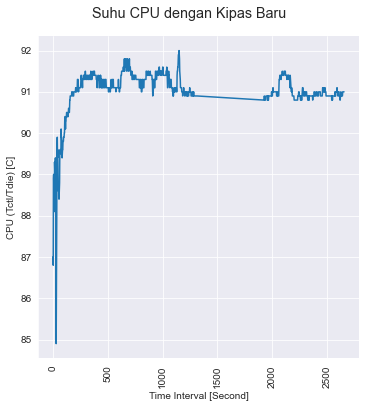

In [26]:
sns.set_style('darkgrid')
g = sns.relplot(
    y='CPU (Tctl/Tdie) [C]',
    x='Time Interval [Second]',
    data=cpu_data,
    kind='line')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(30,20)})
g.fig.suptitle('Suhu CPU dengan Kipas Baru', y=1.05)
g.savefig("Suhu CPU dengan Kipas Baru.png")

In [27]:
drive_data.head()

,Time,Time Interval [Second],Drive Temperature [C]
0,2021-08-17 13:38:04,0,46
1,2021-08-17 13:38:06,2,46
2,2021-08-17 13:38:08,4,46
3,2021-08-17 13:38:10,6,47
4,2021-08-17 13:38:12,8,46


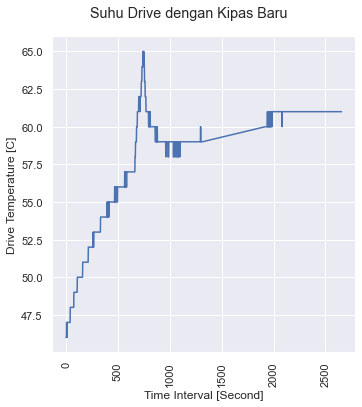

In [28]:
sns.set_style('darkgrid')
g = sns.relplot(
    y='Drive Temperature [C]',
    x='Time Interval [Second]',
    data=drive_data,
    kind='line')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(30,20)})
g.fig.suptitle('Suhu Drive dengan Kipas Baru', y=1.05)
g.savefig("Suhu Drive dengan Kipas Baru.png")

In [29]:
gpu_data.head()

,Time,Time Interval [Second],Framerate [FPS],GPU Temperature [C].1,GPU Hot Spot Temperature [C]
0,2021-08-17 13:38:04,0,72.6,63.5,76.1
1,2021-08-17 13:38:06,2,300.5,65.8,78.8
2,2021-08-17 13:38:08,4,301.0,66.2,79.2
3,2021-08-17 13:38:10,6,307.2,67.1,80.0
4,2021-08-17 13:38:12,8,307.4,67.4,80.4


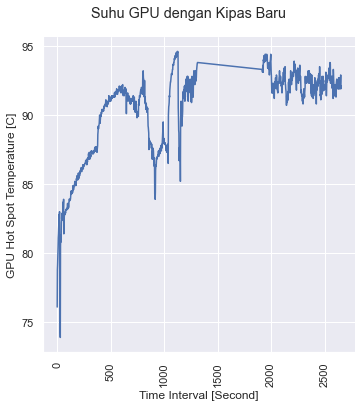

In [30]:
sns.set_style('darkgrid')
g = sns.relplot(
    y='GPU Hot Spot Temperature [C]',
    x='Time Interval [Second]',
    data=gpu_data,
    kind='line')
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(30,20)})
g.fig.suptitle('Suhu GPU dengan Kipas Baru', y=1.05)
g.savefig("Suhu GPU dengan Kipas Baru.png")

## Fungsi _cleaning_ data

Untuk memudahkan proses _cleaning_ dan _engineering_ kedepannya, maka dibuatlah fungsi yang mencakup proses _cleaning_ data yang telah dijabarkan sebelumnya. 

In [31]:
def clean_data(path):
    with open(path, encoding='utf8', errors='ignore') as data:
        df = pd.read_csv(data)
     
    # Memeriksa tipe data dalam file CSV
    num_feat = [feat for feat in df if df[feat].dtype!=object]
    cat_feat = [feat for feat in df if df[feat].dtype==object]

    # Menghilangkan kolom Unnamed: 251
    df = df.drop(columns=['Unnamed: 251'])
    
    # Mengubah tipe data object menjadi datetime
    df['Time'] = pd.to_datetime(df['Time'],errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
    
    # Menghilangkan kolom dengan nilai NULL atau NaN
    df = df.dropna(how='any', axis=0)
    
    # Mendefinisikan ulang index
    df.reset_index(drop=True, inplace=True)
    
    # Menambahkan kolom Time Interval dengan satuan detik
    df.insert(2, 'Time Interval [Second]', 0, True)
    
    # Mengubah data waktu pada kolom Time Interval ke dalam satuan detik
    for i in df.index:
        if i==0:
            df['Time Interval [Second]'][0] = df['Time'][0]-df['Time'][0]
            df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()

        else:
            df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
            df['Time Interval [Second]'][i] = df['Time Interval [Second]'][i].total_seconds()
        
    # Mengubah tipe data object menjadi integer 
    df['Time Interval [Second]'] = df['Time Interval [Second]'].astype('int')
    
    # Mengubah tipe data object menjadi numerik (float atau integer)
    for feat in cat_feat:
        if feat == 'Date' or feat == 'Time':
            pass
        else:
            try:
                #print(feat)
                df[feat] = pd.to_numeric(df[feat], errors='coerce')
            except ValueError:
                pass
            
    # Memasukkan nilai untuk visualisasi kepada dataframe baru        
    new_df = df[['Time']]
    new_df.insert(loc=1, column='Time Interval [Second]', value=df['Time Interval [Second]'])
    new_df.insert(loc=2, column='CPU Temperature [C]', value=df['CPU (Tctl/Tdie) [C]'])
    new_df.insert(loc=3, column='CPU Clocks [MHz]', value=df['Core Clocks (avg) [MHz]'])
    new_df.insert(loc=4, column='Drive Temperature [C]', value=df['Drive Temperature [C]'])
    new_df.insert(loc=5, column='GPU Temperature [C]', value=df['GPU Hot Spot Temperature [C]'])
    new_df.insert(loc=6, column='GPU Clocks [MHz]', value=df['GPU Clock [MHz]'])
    
    return new_df, df

In [32]:
data_kipas2, df = clean_data('cooling pad 2 (baru).CSV')

<ipython-input-31-9d649d9a247c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()
<ipython-input-31-9d649d9a247c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
<ipython-input-31-9d649d9a247c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time Interv

In [33]:
data_kipas1, df = clean_data('cooling pad 1 (lama).CSV')

<ipython-input-31-9d649d9a247c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()
<ipython-input-31-9d649d9a247c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
<ipython-input-31-9d649d9a247c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time Interv

In [34]:
data_kipas3, df = clean_data('tanpa cooling pad.CSV')

<ipython-input-31-9d649d9a247c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][0] = df['Time Interval [Second]'][0].total_seconds()
<ipython-input-31-9d649d9a247c>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time'][i]-df['Time'][0]
<ipython-input-31-9d649d9a247c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time Interval [Second]'][i] = df['Time Interv

In [35]:
data_kipas1.head()

,Time,Time Interval [Second],CPU Temperature [C],CPU Clocks [MHz],Drive Temperature [C],GPU Temperature [C],GPU Clocks [MHz]
0,2021-08-17 22:19:20.086,0,71.0,3696.1,43,61.5,1050.0
1,2021-08-17 22:19:22.150,2,74.4,4267.3,42,62.2,400.0
2,2021-08-17 22:19:24.213,4,74.8,3096.8,42,62.4,400.0
3,2021-08-17 22:19:26.273,6,73.6,3098.6,42,62.9,400.0
4,2021-08-17 22:19:28.329,8,72.5,3398.0,43,63.3,400.0


In [36]:
data_kipas2.head()

,Time,Time Interval [Second],CPU Temperature [C],CPU Clocks [MHz],Drive Temperature [C],GPU Temperature [C],GPU Clocks [MHz]
0,2021-08-17 15:58:39.341,0,66.6,3099.6,41,55.5,400.0
1,2021-08-17 15:58:41.405,2,68.4,3993.8,41,56.4,1362.0
2,2021-08-17 15:58:43.463,4,66.8,4288.7,41,57.6,400.0
3,2021-08-17 15:58:45.574,6,75.6,4229.4,41,58.6,400.0
4,2021-08-17 15:58:47.630,8,74.4,2503.6,41,59.2,1600.0


In [37]:
data_kipas3.head()

,Time,Time Interval [Second],CPU Temperature [C],CPU Clocks [MHz],Drive Temperature [C],GPU Temperature [C],GPU Clocks [MHz]
0,2021-08-17 13:38:04.193,0,87.0,3163.2,46,76.1,1600.0
1,2021-08-17 13:38:06.246,2,86.8,4217.6,46,78.8,1600.0
2,2021-08-17 13:38:08.306,4,88.9,3901.4,46,79.2,1600.0
3,2021-08-17 13:38:10.380,6,89.0,4208.2,47,80.0,1600.0
4,2021-08-17 13:38:12.443,8,88.4,4192.6,46,80.4,1600.0


## Fungsi visualisasi data

In [38]:
def line_data(x1,y1,label1,x2,y2,label2,x3,y3,label3,title,x_ax,y_ax):
    plt.subplots(figsize=(15,10))
    plt.plot(x1, y1, label = label1, linewidth=1, linestyle='-')
    plt.plot(x2, y2, label = label2, linewidth=1, linestyle='-')
    plt.plot(x3, y3, label = label3, linewidth=1, linestyle='-')
    plt.title(title)
    plt.xlabel(x_ax)
    plt.ylabel(y_ax)
    plt.legend()
    plt.savefig(title)
    return plt.show()  

In [39]:
def subline_data(x1,y1,label1,x2,y2,label2,x3,y3,label3,title,x_ax,y_ax):
    fig, ax = plt.subplots(3)
    fig.suptitle(title)
    ax[0].plot(x1, y1, label = label1, linewidth=1, linestyle='--', color='orange')
    ax[1].plot(x2, y2, label = label1, linewidth=1, linestyle='--', color='green')
    ax[2].plot(x3, y3, label = label1, linewidth=1, linestyle='--', color='red')
    plt.xlabel(x_ax)
    plt.ylabel(y_ax)
    #plt.legend()
    plt.savefig(title)
    return plt.show()  

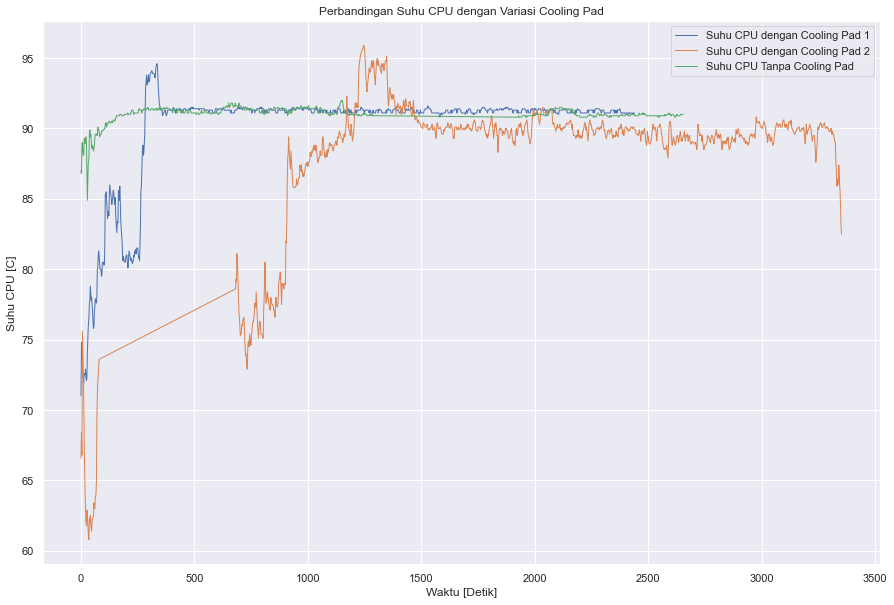

In [40]:
cpu = line_data(
        data_kipas1['Time Interval [Second]'],
        data_kipas1['CPU Temperature [C]'],
        'Suhu CPU dengan Cooling Pad 1',
        data_kipas2['Time Interval [Second]'],
        data_kipas2['CPU Temperature [C]'],
        'Suhu CPU dengan Cooling Pad 2',
        data_kipas3['Time Interval [Second]'],
        data_kipas3['CPU Temperature [C]'],
        'Suhu CPU Tanpa Cooling Pad',
        'Perbandingan Suhu CPU dengan Variasi Cooling Pad',
        'Waktu [Detik]',
        'Suhu CPU [C]'
        )

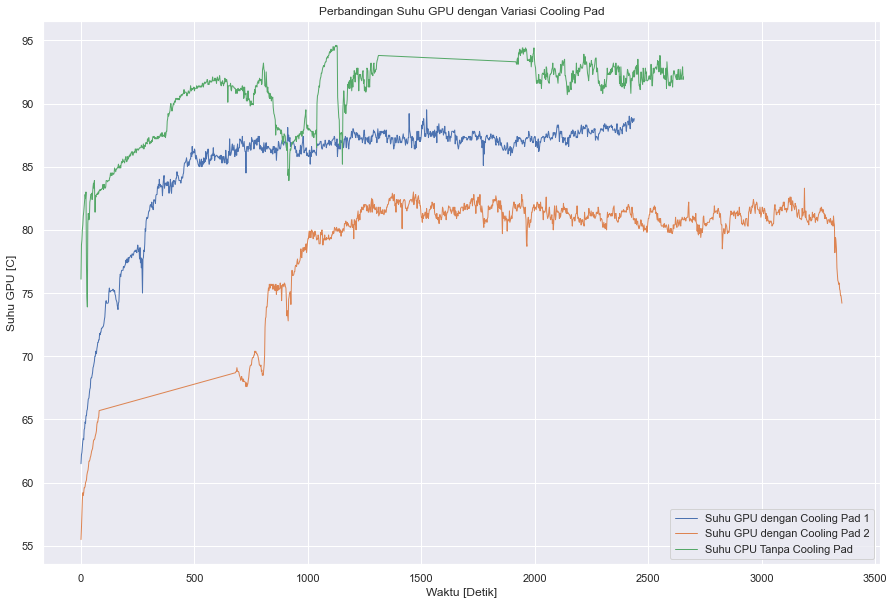

In [41]:
gpu = line_data(
        data_kipas1['Time Interval [Second]'],
        data_kipas1['GPU Temperature [C]'],
        'Suhu GPU dengan Cooling Pad 1',
        data_kipas2['Time Interval [Second]'],
        data_kipas2['GPU Temperature [C]'],
        'Suhu GPU dengan Cooling Pad 2',
        data_kipas3['Time Interval [Second]'],
        data_kipas3['GPU Temperature [C]'],
        'Suhu CPU Tanpa Cooling Pad',
        'Perbandingan Suhu GPU dengan Variasi Cooling Pad',
        'Waktu [Detik]',
        'Suhu GPU [C]'
        )

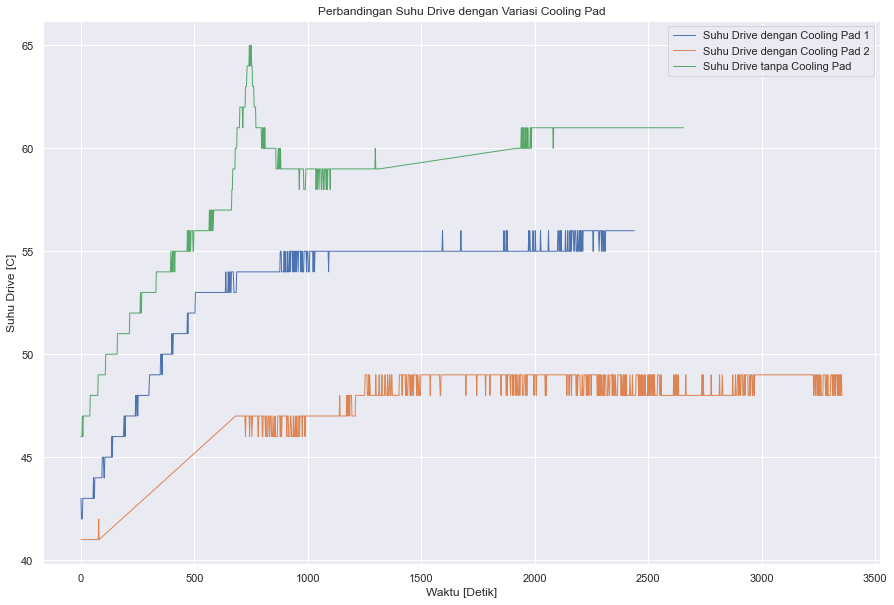

In [42]:
drive = line_data(data_kipas1['Time Interval [Second]'],
        data_kipas1['Drive Temperature [C]'],
        'Suhu Drive dengan Cooling Pad 1',
        data_kipas2['Time Interval [Second]'],
        data_kipas2['Drive Temperature [C]'],
        'Suhu Drive dengan Cooling Pad 2',
        data_kipas3['Time Interval [Second]'],
        data_kipas3['Drive Temperature [C]'],
        'Suhu Drive tanpa Cooling Pad',
        'Perbandingan Suhu Drive dengan Variasi Cooling Pad',
        'Waktu [Detik]',
        'Suhu Drive [C]'
        )

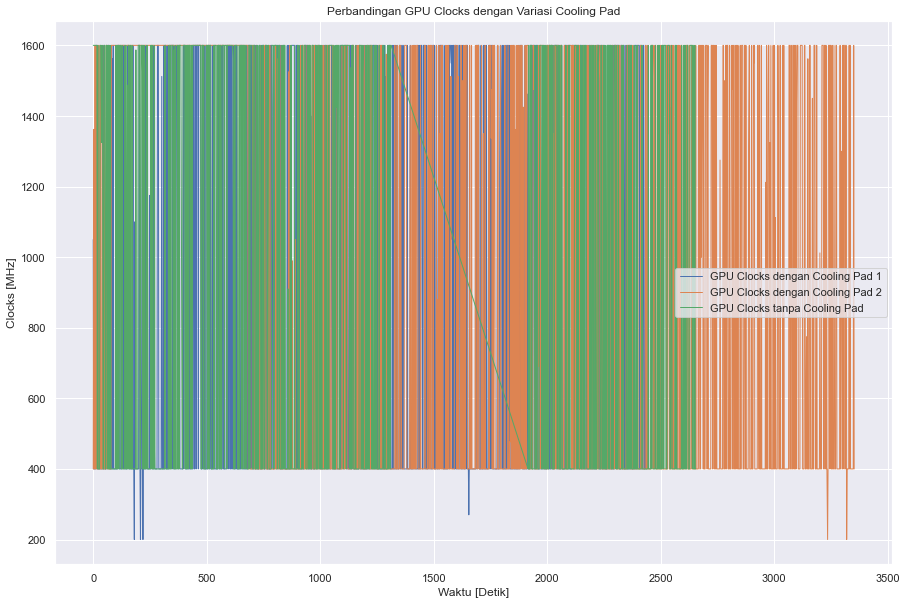

In [43]:
gpu_clock = line_data(
        data_kipas1['Time Interval [Second]'],
        data_kipas1['GPU Clocks [MHz]'],
        'GPU Clocks dengan Cooling Pad 1',
        data_kipas2['Time Interval [Second]'],
        data_kipas2['GPU Clocks [MHz]'],
        'GPU Clocks dengan Cooling Pad 2',
        data_kipas3['Time Interval [Second]'],
        data_kipas3['GPU Clocks [MHz]'],
        'GPU Clocks tanpa Cooling Pad',
        'Perbandingan GPU Clocks dengan Variasi Cooling Pad',
        'Waktu [Detik]',
        'Clocks [MHz]'
        )

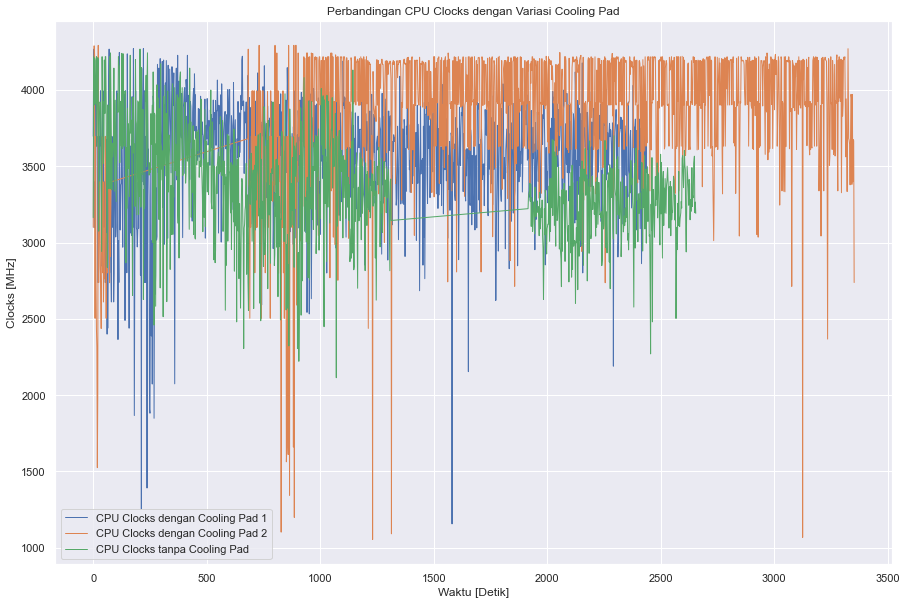

In [44]:
cpu_clock = line_data(
        data_kipas1['Time Interval [Second]'],
        data_kipas1['CPU Clocks [MHz]'],
        'CPU Clocks dengan Cooling Pad 1',
        data_kipas2['Time Interval [Second]'],
        data_kipas2['CPU Clocks [MHz]'],
        'CPU Clocks dengan Cooling Pad 2',
        data_kipas3['Time Interval [Second]'],
        data_kipas3['CPU Clocks [MHz]'],
        'CPU Clocks tanpa Cooling Pad',
        'Perbandingan CPU Clocks dengan Variasi Cooling Pad',
        'Waktu [Detik]',
        'Clocks [MHz]'
        )